In [1]:
import nltk
import re
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore', category=DeprecationWarning)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [2]:
tweets = pd.read_json("C:/Users/HP/anaconda3/DataScience/NaturalLanguageProcessing/tweets.json")

In [3]:
df= tweets

In [4]:
df=df.T

In [5]:
df.head()

,tweet_author,tweet_text
2013-07-18 09:39:46.071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...
2013-07-17 03:40:32.173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...
2013-07-15 15:41:16.553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...
2013-07-12 19:19:42.367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...
2013-07-04 12:40:34.334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...


In [6]:
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
unique_text = df.tweet_text.unique()
print(len(unique_text))

41776


In [7]:
df.head()

,tweet_author,tweet_text
2013-07-18 09:39:46.071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...
2013-07-17 03:40:32.173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...
2013-07-15 15:41:16.553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...
2013-07-12 19:19:42.367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...
2013-07-04 12:40:34.334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...


In [8]:
df['tweet_text'][0]

'⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%. \nhttps://t.co/eJ6m4QpC5P https://t.co/kuZz6ZO47r'

In [9]:
def remove_pattern(input_text,pattern):
    r= re.findall(pattern,input_text)
    for i in r:
        input_text= re.sub(i,'',input_text)
        
    return input_text

### Remove any @mentions

In [10]:
df['clean_text']= np.vectorize(remove_pattern)(df['tweet_text'],"@[\w]*")
df['clean_text'][0:5]

2013-07-18 09:39:46.071961602    ⚕️ Scientists conducted a Phase II study of ac...
2013-07-17 03:40:32.173842437    This phase 2 Acalabrutinib-Venetoclax (AV) tri...
2013-07-15 15:41:16.553048065    #NICE backs #AstraZenecas #Calquence for #CLL ...
2013-07-12 19:19:42.367813635    #acalabrutinib is a valuable option in pts int...
2013-07-04 12:40:34.334232586    NICE has recommended the use of acalabrutinib ...
Name: clean_text, dtype: object

In [11]:
df['clean_text']= df['clean_text'].str.replace("[^a-zA-Z#]"," ")
df['clean_text']= df['clean_text'].str.replace("[[\w]'']"," ")
df['clean_text'][0:5]

<ipython-input-11-acd3bf826c60>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text']= df['clean_text'].str.replace("[^a-zA-Z#]"," ")
<ipython-input-11-acd3bf826c60>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text']= df['clean_text'].str.replace("[[\w]'']"," ")
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\strings\object_array.py:160: FutureWarning: Possible nested set at position 1
  compiled = re.compile(pat, flags=flags)


2013-07-18 09:39:46.071961602       Scientists conducted a Phase II study of ac...
2013-07-17 03:40:32.173842437    This phase   Acalabrutinib Venetoclax  AV  tri...
2013-07-15 15:41:16.553048065    #NICE backs #AstraZenecas #Calquence for #CLL ...
2013-07-12 19:19:42.367813635    #acalabrutinib is a valuable option in pts int...
2013-07-04 12:40:34.334232586    NICE has recommended the use of acalabrutinib ...
Name: clean_text, dtype: object

In [12]:
df['clean_text']= df['clean_text'].str.lower()
df['clean_text'][0:5]

2013-07-18 09:39:46.071961602       scientists conducted a phase ii study of ac...
2013-07-17 03:40:32.173842437    this phase   acalabrutinib venetoclax  av  tri...
2013-07-15 15:41:16.553048065    #nice backs #astrazenecas #calquence for #cll ...
2013-07-12 19:19:42.367813635    #acalabrutinib is a valuable option in pts int...
2013-07-04 12:40:34.334232586    nice has recommended the use of acalabrutinib ...
Name: clean_text, dtype: object

In [13]:

df['clean_text']=df['clean_text'].str.replace("[#]","")
df['clean_text']=df['clean_text'].str.replace("'","")
df['clean_text']=df['clean_text'].str.replace(r'http\S+', '')
df['clean_text']=df['clean_text'].str.replace(r'co\S+', '')
df['clean_text']=df['clean_text'].str.replace(r'cll\S+', '')
df['clean_text'][0:5]

<ipython-input-13-b2796cc204be>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text']=df['clean_text'].str.replace("[#]","")
<ipython-input-13-b2796cc204be>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text']=df['clean_text'].str.replace(r'http\S+', '')
<ipython-input-13-b2796cc204be>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text']=df['clean_text'].str.replace(r'co\S+', '')
<ipython-input-13-b2796cc204be>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text']=df['clean_text'].str.replace(r'cll\S+', '')


2013-07-18 09:39:46.071961602       scientists  a phase ii study of acalabrutin...
2013-07-17 03:40:32.173842437    this phase   acalabrutinib venetoclax  av  tri...
2013-07-15 15:41:16.553048065    nice backs astrazenecas calquence for cll    t...
2013-07-12 19:19:42.367813635    acalabrutinib is a valuable option in pts into...
2013-07-04 12:40:34.334232586    nice has re the use of acalabrutinib for patie...
Name: clean_text, dtype: object

In [14]:
df['clean_text']=df['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(x)>2]))
df.head()

,tweet_author,tweet_text,clean_text
2013-07-18 09:39:46.071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientists a phase ii study of acalabrutinib i...
2013-07-17 03:40:32.173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,this phase acalabrutinib venetoclax av trial t...
2013-07-15 15:41:16.553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,nice backs astrazenecas calquence for cll t co...
2013-07-12 19:19:42.367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...,acalabrutinib is a valuable option in pts into...
2013-07-04 12:40:34.334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice has re the use of acalabrutinib for patie...


In [15]:
tokenized_tweet = df['clean_text'].apply(lambda x: x.split())
tokenized_tweet.head()

2013-07-18 09:39:46.071961602    [scientists, a, phase, ii, study, of, acalabru...
2013-07-17 03:40:32.173842437    [this, phase, acalabrutinib, venetoclax, av, t...
2013-07-15 15:41:16.553048065    [nice, backs, astrazenecas, calquence, for, cl...
2013-07-12 19:19:42.367813635    [acalabrutinib, is, a, valuable, option, in, p...
2013-07-04 12:40:34.334232586    [nice, has, re, the, use, of, acalabrutinib, f...
Name: clean_text, dtype: object

In [16]:
df['tokenized']=tokenized_tweet

In [17]:
df.head()

,tweet_author,tweet_text,clean_text,tokenized
2013-07-18 09:39:46.071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientists a phase ii study of acalabrutinib i...,"[scientists, a, phase, ii, study, of, acalabru..."
2013-07-17 03:40:32.173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,this phase acalabrutinib venetoclax av trial t...,"[this, phase, acalabrutinib, venetoclax, av, t..."
2013-07-15 15:41:16.553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,nice backs astrazenecas calquence for cll t co...,"[nice, backs, astrazenecas, calquence, for, cl..."
2013-07-12 19:19:42.367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...,acalabrutinib is a valuable option in pts into...,"[acalabrutinib, is, a, valuable, option, in, p..."
2013-07-04 12:40:34.334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice has re the use of acalabrutinib for patie...,"[nice, has, re, the, use, of, acalabrutinib, f..."


In [18]:
stopwords = nltk.corpus.stopwords.words('english')
df['tokenized']=df['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])


In [19]:
df.head()

,tweet_author,tweet_text,clean_text,tokenized
2013-07-18 09:39:46.071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientists a phase ii study of acalabrutinib i...,"[scientists, phase, ii, study, acalabrutinib, ..."
2013-07-17 03:40:32.173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,this phase acalabrutinib venetoclax av trial t...,"[phase, acalabrutinib, venetoclax, av, trial, ..."
2013-07-15 15:41:16.553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,nice backs astrazenecas calquence for cll t co...,"[nice, backs, astrazenecas, calquence, cll, co..."
2013-07-12 19:19:42.367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...,acalabrutinib is a valuable option in pts into...,"[acalabrutinib, valuable, option, pts, intoler..."
2013-07-04 12:40:34.334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice has re the use of acalabrutinib for patie...,"[nice, use, acalabrutinib, patients, treatment..."


In [20]:
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

In [21]:

df['lemmatize'] = df['tokenized'].apply(lambda lst:[lemmatizer.lemmatize(word) for word in lst])


In [22]:
df.head()

,tweet_author,tweet_text,clean_text,tokenized,lemmatize
2013-07-18 09:39:46.071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientists a phase ii study of acalabrutinib i...,"[scientists, phase, ii, study, acalabrutinib, ...","[scientist, phase, ii, study, acalabrutinib, p..."
2013-07-17 03:40:32.173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,this phase acalabrutinib venetoclax av trial t...,"[phase, acalabrutinib, venetoclax, av, trial, ...","[phase, acalabrutinib, venetoclax, av, trial, ..."
2013-07-15 15:41:16.553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,nice backs astrazenecas calquence for cll t co...,"[nice, backs, astrazenecas, calquence, cll, co...","[nice, back, astrazenecas, calquence, cll, co,..."
2013-07-12 19:19:42.367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...,acalabrutinib is a valuable option in pts into...,"[acalabrutinib, valuable, option, pts, intoler...","[acalabrutinib, valuable, option, pt, intolera..."
2013-07-04 12:40:34.334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice has re the use of acalabrutinib for patie...,"[nice, use, acalabrutinib, patients, treatment...","[nice, use, acalabrutinib, patient, treatment,..."


In [23]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

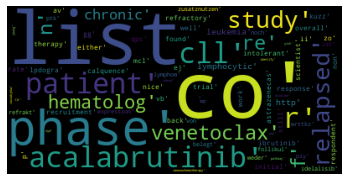

In [24]:
input_text = df['lemmatize'].values 

wordcloud = WordCloud().generate(str(input_text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [25]:
!pip install textblob
!pip install vaderSentiment
!pip install watson_developer_cloud
!pip install config

In [26]:
import glob
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features,EntitiesOptions,KeywordsOptions,SentimentOptions,CategoriesOptions
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,classification_report
import config

In [27]:
df['calculated']=df['clean_text'].apply(lambda x:(TextBlob(x).sentiment.polarity))

In [28]:
df['tweet_text'][0]

'⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%. \nhttps://t.co/eJ6m4QpC5P https://t.co/kuZz6ZO47r'

In [29]:
df['sentiment']=round(df['calculated'])

In [30]:
df3=df.drop(['tweet_text','tokenized','lemmatize'],axis=1)

In [31]:

df3.head()

,tweet_author,clean_text,calculated,sentiment
2013-07-18 09:39:46.071961602,Hematopoiesis News,scientists a phase ii study of acalabrutinib i...,0.00,0.0
2013-07-17 03:40:32.173842437,"Michael Wang, MD",this phase acalabrutinib venetoclax av trial t...,0.00,0.0
2013-07-15 15:41:16.553048065,1stOncology,nice backs astrazenecas calquence for cll t co...,0.60,1.0
2013-07-12 19:19:42.367813635,Toby Eyre,acalabrutinib is a valuable option in pts into...,0.05,0.0
2013-07-04 12:40:34.334232586,Lymphoma Hub,nice has re the use of acalabrutinib for patie...,0.55,1.0


In [32]:
df.head()

,tweet_author,tweet_text,clean_text,tokenized,lemmatize,calculated,sentiment
2013-07-18 09:39:46.071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientists a phase ii study of acalabrutinib i...,"[scientists, phase, ii, study, acalabrutinib, ...","[scientist, phase, ii, study, acalabrutinib, p...",0.00,0.0
2013-07-17 03:40:32.173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,this phase acalabrutinib venetoclax av trial t...,"[phase, acalabrutinib, venetoclax, av, trial, ...","[phase, acalabrutinib, venetoclax, av, trial, ...",0.00,0.0
2013-07-15 15:41:16.553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,nice backs astrazenecas calquence for cll t co...,"[nice, backs, astrazenecas, calquence, cll, co...","[nice, back, astrazenecas, calquence, cll, co,...",0.60,1.0
2013-07-12 19:19:42.367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...,acalabrutinib is a valuable option in pts into...,"[acalabrutinib, valuable, option, pts, intoler...","[acalabrutinib, valuable, option, pt, intolera...",0.05,0.0
2013-07-04 12:40:34.334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice has re the use of acalabrutinib for patie...,"[nice, use, acalabrutinib, patients, treatment...","[nice, use, acalabrutinib, patient, treatment,...",0.55,1.0


In [33]:
df['sentiment']=df['sentiment'].astype(int)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

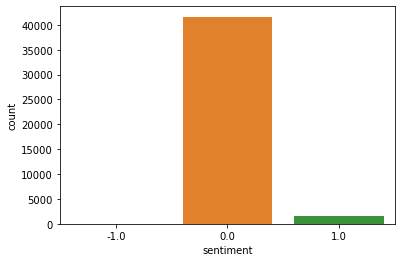

In [35]:
sns.countplot(df3.sentiment)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [37]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from sklearn.metrics import plot_confusion_matrix

In [38]:
cv = CountVectorizer(ngram_range=(1,2))
train_data = cv.fit_transform(df['tweet_text'])
X = train_data
y = df.sentiment

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [41]:
nb=MultinomialNB()

In [42]:
nb.fit(x_train,y_train)

MultinomialNB()

In [43]:
pred=nb.predict(x_test)

In [44]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
accuracy_score(y_test,pred)

0.9371011149557862

In [46]:
confusion_matrix(y_test,pred)

array([[    0,    16,     0],
       [    1, 12129,   359],
       [    0,   442,    58]], dtype=int64)

In [47]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        16
           0       0.96      0.97      0.97     12489
           1       0.14      0.12      0.13       500

    accuracy                           0.94     13005
   macro avg       0.37      0.36      0.36     13005
weighted avg       0.93      0.94      0.93     13005



In [48]:
dt=DecisionTreeClassifier()

In [49]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
pre=dt.predict(x_test)

In [51]:
pre

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
accuracy_score(y_test,pre)

0.9713187235678585

In [53]:
confusion_matrix(y_test,pre)

array([[    4,    12,     0],
       [    6, 12277,   206],
       [    0,   149,   351]], dtype=int64)

In [54]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

          -1       0.40      0.25      0.31        16
           0       0.99      0.98      0.99     12489
           1       0.63      0.70      0.66       500

    accuracy                           0.97     13005
   macro avg       0.67      0.65      0.65     13005
weighted avg       0.97      0.97      0.97     13005



In [ ]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000, 5000],
             'max_depth': [3, 5, None],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 5],
             'bootstrap': [True, False]}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_